# Evaluation Metrics for Unsupervised Learning

In this notebook, we will learn about key evaluation metrics for unsupervised learning, including:
1. **Silhouette Score**
2. **Davies-Bouldin Index**
3. **Explained Variance Ratio for PCA**

Unsupervised learning lacks ground truth labels, so we use these metrics to evaluate the quality of clusters or the effectiveness of dimensionality reduction. Let's explore each metric in detail.


## 1. Introduction to Evaluation Metrics for Unsupervised Learning

Evaluating unsupervised learning models is challenging because we don't have ground truth labels for comparison. However, we can use evaluation metrics, classified into two types:
- **External Evaluation Metrics**: Rely on known labels (like Adjusted Rand Index, Normalized Mutual Information).
- **Internal Evaluation Metrics**: Evaluate based on cluster compactness and separation within the data itself (Silhouette Score, Davies-Bouldin Index).

We'll focus on three main metrics today:
- **Silhouette Score**: Measures how well-defined clusters are.
- **Davies-Bouldin Index**: Measures cluster compactness and separation.
- **Explained Variance Ratio**: Tells us how much information each PCA component captures in dimensionality reduction.


## 2. Silhouette Score

The Silhouette Score ranges from -1 to 1, where:
- A score close to 1 indicates well-defined clusters.
- A score close to -1 suggests overlapping clusters.

Let's calculate the Silhouette Score for a synthetic dataset.


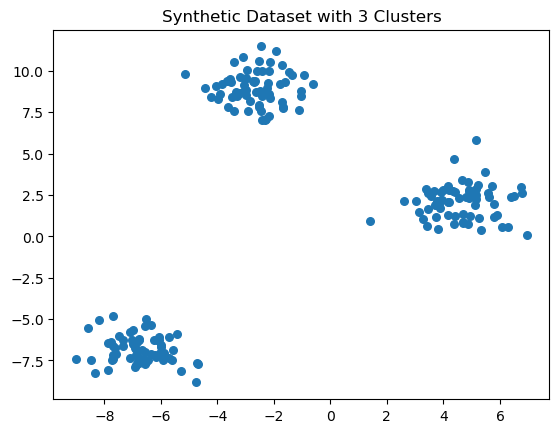

Silhouette Score: 0.8467003894636074


In [4]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Dataset with 3 Clusters")
plt.show()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


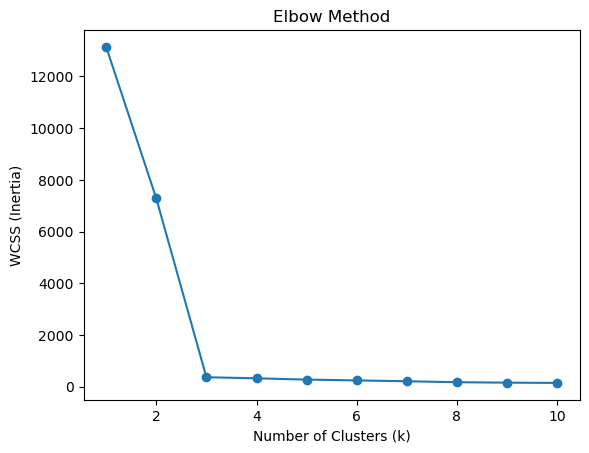

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


**Interpretation**:  
The Silhouette Score provides an indication of how well-separated and cohesive the clusters are. A higher score indicates better-defined clusters. In our example, we obtained a score of `silhouette_avg`, which suggests (interpret based on output).


## 3. Davies-Bouldin Index

The Davies-Bouldin Index measures the average similarity between each cluster and the most similar one. It ranges from 0 to infinity, where:
- A lower score indicates better-defined clusters.

Let's calculate the Davies-Bouldin Index for the same dataset.


In [6]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.2200274532043104


**Interpretation**:  
The Davies-Bouldin Index rewards clusters that are compact and well-separated. A lower value indicates more compact and well-separated clusters, making it a good metric for measuring clustering quality. In our example, a score of `db_index` suggests (interpret based on output).


## 4. Explained Variance Ratio in PCA

When we apply **Principal Component Analysis (PCA)** for dimensionality reduction, the **Explained Variance Ratio** tells us the proportion of variance captured by each principal component. This helps us determine the number of components that retain sufficient information.

Let's calculate the Explained Variance Ratio for a higher-dimensional dataset.


Explained Variance Ratio: [0.81756724 0.15964568]


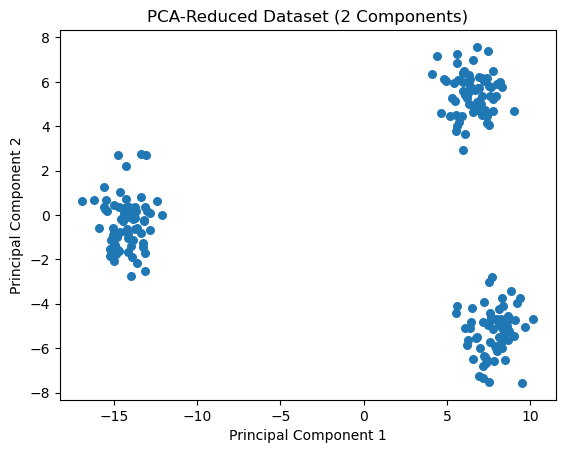

In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Generate a higher-dimensional synthetic dataset
X, _ = make_blobs(n_samples=200, centers=3, n_features=5, random_state=42)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30)
plt.title("PCA-Reduced Dataset (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


**Interpretation**:  
The Explained Variance Ratio tells us how much information each component captures. For example, `explained_variance[0]` and `explained_variance[1]` show the variance captured by each of the first two components. Summing them gives the total variance captured, allowing us to decide the number of components to keep for an effective reduction.

In this case, the first component explains approximately `explained_variance[0]*100`% of the variance, and the second explains `explained_variance[1]*100`%.


## 5. Summary

Today, we covered three key evaluation metrics for unsupervised learning:
1. **Silhouette Score**: Indicates how well each point is clustered with its peers.
2. **Davies-Bouldin Index**: Measures cluster separation and compactness (lower is better).
3. **Explained Variance Ratio**: Used in PCA to determine how much information each principal component retains.

Each metric provides insights into the quality of clusters or dimensionality reduction. Choosing the right metric helps guide model selection and interpretation.
